In [1]:
spark

In [5]:
import json
import numpy as np
import time
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from operator import add

In [65]:
from pyspark.sql.functions import explode
def preprocessing(data):
    print ("preprocessing ...")
    data = data.filter((data.inflow_channel == "i") & (data.tabcode == "tot"))
    print ("preprocessing complete")
    return data

def make_df(path):
    print ("make_df")
    return spark.read.json(path)
    
def extract_count(code_data,click_data):
    print ("extract_count ...")
    ser = code_data.filter(code_data.display.SER.isNotNull()).select(explode("display.SER.code")).withColumnRenamed('col','code')
    ser_click = click_data.filter(click_data.collection.isNotNull()).select('collection.code')
    return ser.groupBy("code").count().sort("count",ascending=False).withColumnRenamed('count','code_count'), \
            ser_click.groupBy("code").count().sort("count",ascending=False).withColumnRenamed('count','click_count')
    
def calculate_ctr(code_count,click_count):
    print "calculate ctr ..."
    ctr = code_count.join(click_count, code_count.code == click_count.code, 'inner').drop(click_count.code)
    ctr = ctr.withColumn('ctr', ctr.click_count / ctr.code_count).sort('ctr',ascending=False)
    return ctr

In [66]:
pc_query_path = '/Log/Type=Search/SubType1=Dialog/SubType2=Hour/Device=PC/Kind=Query/Year=2019/Month=07/Day=14'
pc_click_path = '/Log/Type=Search/SubType1=Dialog/SubType2=Hour/Device=PC/Kind=Click/Year=2019/Month=07/Day=14'
mobile_query_path = '/Log/Type=Search/SubType1=Dialog/SubType2=Hour/Device=Mobile/Kind=Query/Year=2019/Month=07/Day=14'
mobile_click_path = '/Log/Type=Search/SubType1=Dialog/SubType2=Hour/Device=Mobile/Kind=Click/Year=2019/Month=07/Day=14'

In [70]:
pc_query_data = preprocessing(make_df(pc_query_path))
pc_click_data = preprocessing(make_df(pc_click_path))
mobile_query_data = preprocessing(make_df(mobile_query_path))
mobile_click_data = preprocessing(make_df(mobile_click_path))

make_df
preprocessing ...
preprocessing complete
make_df
preprocessing ...
preprocessing complete
make_df
preprocessing ...
preprocessing complete
make_df
preprocessing ...
preprocessing complete


In [73]:
pc_code_count, pc_click_count = extract_count(pc_query_data,pc_click_data) 
mobile_code_count, mobile_click_count = extract_count(mobile_query_data,mobile_click_data)

extract_count ...
extract_count ...


In [74]:
pc_ctr = calculate_ctr(pc_code_count,pc_click_count)
mobile_ctr = calculate_ctr(mobile_code_count,mobile_click_count)

calculate ctr ...
calculate ctr ...


In [81]:
pc_code_count.take(10)

[Row(code=u'BR1', code_count=7113689),
 Row(code=u'CCB', code_count=6675063),
 Row(code=u'CLO', code_count=6145318),
 Row(code=u'WSA', code_count=5769085),
 Row(code=u'NNS', code_count=5747598),
 Row(code=u'VO2', code_count=5012140),
 Row(code=u'NKS', code_count=4828704),
 Row(code=u'IIM', code_count=4816643),
 Row(code=u'IVR', code_count=4130100),
 Row(code=u'1DV', code_count=3140257)]

In [76]:
pc_ctr_list = pc_ctr.select("code","ctr","code_count","click_count").collect()

In [77]:
mobile_ctr_list = mobile_ctr.select("code","ctr","code_count","click_count").collect()

In [88]:
code_k = []
code_v = []
for meta in pc_ctr_list:
    code_k.append(meta[0])
    code_v.append(meta[1])

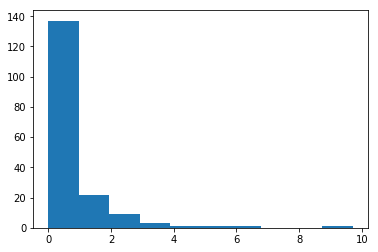

In [89]:
plt.hist(code_v)
plt.show()

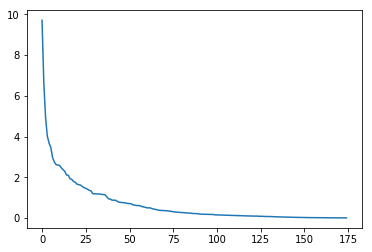

In [90]:
plt.plot(code_v)
plt.show()

In [ ]:
click_count = ser_click.groupBy("code").count().sort("count",ascending=False).withColumnRenamed('count','click_count')

In [ ]:
ctr = code_count.join(click_count, code_count.code == click_count.code, 'inner').drop(click_count.code)

In [ ]:
ctr.printSchema()

In [ ]:
ctr = ctr.withColumn('ctr', ctr.click_count / ctr.code_count).sort('ctr',ascending=False)

In [ ]:
ctr.printSchema()

In [ ]:
ctr.take(10)

In [ ]:
ctr_list = ctr.select("code","ctr","code_count","click_count").collect()

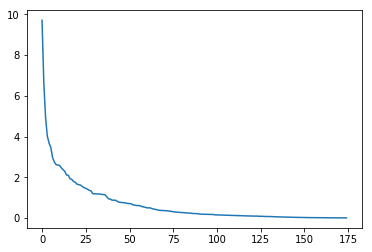

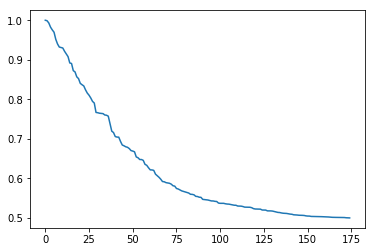

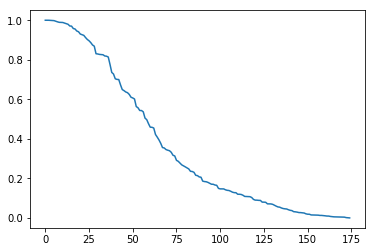

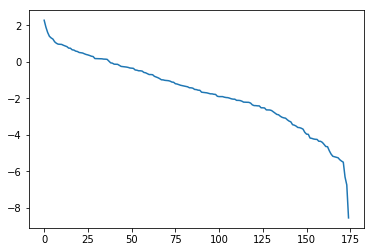

In [78]:
ctr_v = []
ctr_sig = []
ctr_tanh = []
for ctr in pc_ctr_list:
    ctr_v.append(ctr[1])
    ctr_sig.append(1/(1+np.exp(-ctr[1])))
    ctr_tanh.append((np.exp(ctr[1])-np.exp(-ctr[1]))/(np.exp(ctr[1])+np.exp(-ctr[1])))
    
plt.plot(ctr_v)
plt.show()
plt.plot(ctr_sig)
plt.show()
plt.plot(ctr_tanh)
plt.show()
plt.plot(np.log(ctr_v))
plt.show()

In [79]:
for ctr in pc_ctr_list:
    print (ctr)

Row(code=u'MFS', ctr=9.714285714285714, code_count=7, click_count=68)
Row(code=u'Z7T', ctr=6.6516651665166515, code_count=1111, click_count=7390)
Row(code=u'Z1T', ctr=4.959664320519762, code_count=3694, click_count=18321)
Row(code=u'CC9', ctr=4.027027027027027, code_count=37, click_count=149)
Row(code=u'SRZ', ctr=3.682926829268293, code_count=41, click_count=151)
Row(code=u'UNS', ctr=3.462657366451174, code_count=11756, click_count=40707)
Row(code=u'CC6', ctr=2.9789473684210526, code_count=95, click_count=283)
Row(code=u'MAC', ctr=2.75, code_count=8, click_count=22)
Row(code=u'CC1', ctr=2.6207438449449976, code_count=1909, click_count=5003)
Row(code=u'FMU', ctr=2.6031746031746033, code_count=126, click_count=328)
Row(code=u'Z8T', ctr=2.5826695531464834, code_count=121024, click_count=312565)
Row(code=u'CC5', ctr=2.4634146341463414, code_count=82, click_count=202)
Row(code=u'CC4', ctr=2.3733333333333335, code_count=225, click_count=534)
Row(code=u'CC3', ctr=2.288793103448276, code_count